In [8]:
import os
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.api import het_breuschpagan
from statsmodels.compat import lzip



### 1. (35%) Linear Regression Analysis for Wine Quality 

(a)  (10%) Show the results of regression analysis as follows

In [9]:
df = pd.read_csv(os.path.join('Assignment1_Data', "MDS_Assignment1_furnace.csv"))

pred = df.grade
X = []
D = df[df.columns[:28]]

X = sm.add_constant(D)
est = sm.OLS(pred, X)

summary = est.fit().summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     21.52
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.16e-70
Time:                        16:00:56   Log-Likelihood:                -381.52
No. Observations:                 620   AIC:                             819.0
Df Residuals:                     592   BIC:                             943.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0339      0.018    110.528      0.000       1.998       2.070
f0            -0.0055      0.025     -0.224      0.823      -0.054       0.043
f1             0.0440      0.028      1.571      0.117      -0.011       0.099
f2             0.3140      0.035      9.028      0.000       0.246       0.382
f3             0.0186      0.042      0.447      0.655      -0.063       0.100
f4            -0.0035      0.038     -0.091      0.928      -0.078       0.072
f5            -0.0740      0.030     -2.483      0.013      -0.133      -0.015
f6            -0.0710      0.026     -2.742      0.006      -0.122      -0.020
f7             0.0235      0.028      0.853      0.394      -0.031       0.078
f8             0.0410      0.019      2.170      0.030       0.004       0.078
f9          1.099e-18   3.77e-17      0.029      0.977   -7.29e-17    7.51e-17
f10           -0.0446      0.021     -2.119      0.035      -0.086      -0.003
f11           -0.0292      0.020     -1.438      0.151      -0.069       0.011
f12           -0.0006      0.022     -0.027      0.979      -0.044       0.043
f13            0.0336      0.024      1.412      0.159      -0.013       0.080
f14           -0.1832      0.021     -8.898      0.000      -0.224      -0.143
f15           -0.1061      0.019     -5.565      0.000      -0.144      -0.069
f16           -0.0358      0.020     -1.756      0.080      -0.076       0.004
f17            0.0633      0.019      3.409      0.001       0.027       0.100
f18           -0.1904      0.021     -9.194      0.000      -0.231      -0.150
f19            0.0278      0.026      1.051      0.294      -0.024       0.080
f20            0.0126      0.020      0.644      0.520      -0.026       0.051
f21           -0.0357      0.028     -1.263      0.207      -0.091       0.020
f22            0.0747      0.021      3.533      0.000       0.033       0.116
f23           -0.0088      0.020     -0.442      0.659      -0.048       0.030
f24            0.0193      0.024      0.800      0.424      -0.028       0.067
f25           -0.0679      0.020     -3.406      0.001      -0.107      -0.029
f26           -0.0360      0.022     -1.625      0.105      -0.080       0.008
f27           -0.0062      0.019     -0.324      0.746      -0.044       0.031
==============================================================================
Omnibus:                       39.669   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.525
Skew:                           0.090   Prob(JB):                     9.23e-33
Kurtosis:                       5.383   Cond. No.                     1.45e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

(b) (5%) The fitting of the linear regression is a good idea? If yes, why? If no, why? What’s the 
possible reason of poor fitting?

ans:　In term of R-squared, 0.495, the data are not properly fitting of the linear regression. The reason may be there are too many variables and some of them even have high correlation.

(c)  (5%) Based on the results, rank the independent variables by p-values and which one are 
statistically significant variables with p-values<0.01? (i.e.  重要變數挑選

In [10]:
result = est.fit()

rank_list = [[f'f{i}', value] for i, value in enumerate(result.pvalues[1:])]

rank_list = sorted(rank_list, key=lambda x: x[1], reverse=True)

rank_list

[['f12', 0.9785197859614874],
 ['f9', 0.9767336093519265],
 ['f4', 0.9275233545711323],
 ['f0', 0.8231798305691757],
 ['f27', 0.746418963210185],
 ['f23', 0.6586476274404331],
 ['f3', 0.6547220406461656],
 ['f20', 0.5200766295845728],
 ['f24', 0.4237986071566925],
 ['f7', 0.3938390613512338],
 ['f19', 0.2938197302294693],
 ['f21', 0.2071130863070468],
 ['f13', 0.1585855950754586],
 ['f11', 0.1509174478955036],
 ['f1', 0.11674036608665472],
 ['f26', 0.10464646982813],
 ['f16', 0.07959189207626322],
 ['f10', 0.03450385822318996],
 ['f8', 0.030366136511410135],
 ['f5', 0.013312066540727224],
 ['f6', 0.006295707579197242],
 ['f25', 0.0007041639436919529],
 ['f17', 0.0006967770048962991],
 ['f22', 0.0004429124783520263],
 ['f15', 3.971325677177405e-08],
 ['f14', 6.896905393341919e-18],
 ['f2', 2.4303678500954458e-18],
 ['f18', 6.355894795964338e-19]]

From the result, we can inference f18, f2, f14, f15, f22, f17, f25, and f6 are statistically significant variables beacause their p-value is less than 0.01.

(d) (15%) Testify the underlying assumptions of regression (1) Normality, (2) Independence, and (3) Homogeneity of Variance with respect to residual.

In [11]:
# Normailty
print("Normailty: ")
shapiro_test = st.shapiro(result.resid)
print(shapiro_test)
print()

# Independence
print("Independence: ")
print(durbin_watson(result.resid))
print()
header = [
    'Lagrange multiplier statistic',
    'p-value',
    'f-value',
    'f p-value',
]

# Homogeneity of variance
print("Homogeneity of variance: ")
test = het_breuschpagan(result.resid, result.model.exog)

table = lzip(header, test)

print(table)

Normailty: 
ShapiroResult(statistic=0.9345124363899231, pvalue=7.536043131996446e-16)

Independence: 
2.0040534804722108

Homogeneity of variance: 
[('Lagrange multiplier statistic', 140.62034965182636), ('p-value', 5.87184293010525e-17), ('f-value', 6.431710999631284), ('f p-value', 5.3118156753529414e-20)]


### 2. (35%) Association Rule- Market Basket Analysis

(1)  (10%) How to handle the raw dataset via data preprocessing?

In [12]:
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

receipts_path = os.path.join('Assignment1_Data','MDS_Assignment1_groceries.csv')

receipts_lst = []
with open(receipts_path, 'r') as f:
    receipts = f.readlines()
    # item_set = list({item for receipt in receipts for item in receipt.replace('\n', '').split(',')})
    
    # for receipt in receipts:
    #     receipt_lst = [item_set.index(item_name) for item_name in receipt.replace('\n', '').split(',')]
    #     receipts_lst.append(receipt_lst)

    # for id_lst in receipts_lst:
    #     multi_hot_vec = [1 if i in id_lst else 0 for i in range(len(item_set)) ]
    #     multi_hot_lst.append(multi_hot_vec)
    for receipt in receipts:
        receipt_lst = [item_name for item_name in receipt.replace('\n', '').split(',')]
        receipts_lst.append(receipt_lst)

te = TransactionEncoder()
te_ary = te.fit(receipts_lst).transform(receipts_lst)
df = pd.DataFrame(te_ary, columns=te.columns_)

ans:<br>
step 1: load data from csv through pandas package. <br>
step 2: saperate each item for evey line and put them in list.<br>
<br>
Thus, we can get a 2-dimension list. For each sub-list in the list, it represents a certain transaction.<br>

(2)  (10%) What’s the top 5 association rules? Show the support, confidence, and lift to each 
specific rule, respectively?

In [26]:
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules[
    (rules['confidence'] >= 15e-2)
].sort_values(by=['support'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4606,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
4607,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
5033,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
5032,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
5425,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
...,...,...,...,...,...,...,...,...,...
27239,"(pastry, dessert)",(fruit/vegetable juice),0.005389,0.072293,0.001017,0.188679,2.609930,0.000627,1.143453
27240,"(fruit/vegetable juice, dessert)",(pastry),0.005999,0.088968,0.001017,0.169492,1.905085,0.000483,1.096957
27245,"(pip fruit, dessert)",(fruit/vegetable juice),0.004982,0.072293,0.001017,0.204082,2.822986,0.000657,1.165581
27246,"(fruit/vegetable juice, dessert)",(pip fruit),0.005999,0.075648,0.001017,0.169492,2.240523,0.000563,1.112995


ans: <br>
The top 5 association rules are:<br>
- (whole milk) -> (other vegetables), with (support, confidence, lift) = (0.074835, 0.292877, 1.513634) 
- (other vegetables) -> (whole milk), with (support, confidence, lift) = (0.074835, 0.386758, 1.513634) 
- (rolls/buns) -> (whole milk), with (support, confidence, lift) = (0.056634, 0.307905, 1.205032) 
- (whole milk) -> (rolls/buns), with (support, confidence, lift) = (0.056634, 0.221647, 1.205032) 
- (yogurt) -> (whole milk), with (support, confidence, lift) = (0.056024, 0.401603, 1.571735) 

(3)  (5%) Please provide/guess the “story” to interpret one of top-5 rules you are interested in.

ans: <br>
I think people who bought rolls/buns tend to buy whole milk is pretty instinctive. It is a common combination no matter for breakfast or afternoon tea in western.

(4)  (10%) Give a visualization graph of your association rules. 

In [ ]:
from pycaret.utils import enable_colab
from pycaret.arules import *
enable_colab()

In [ ]:
plot_model(rules, plot='3d')

### 3. (30%) Manufacturing System Analysis

In [14]:
STATION_CNT = 5
m_cnt = [3, 3, 6, 2, 5]
p_time = [5, 8, 12, 4, 12]

# by definition, TH is the quantities that a station can process for each hour
TH = [round(m*(1/p),2) for m, p in zip(m_cnt, p_time)]
r_b = min(TH)
print('TH:')
for i in range(STATION_CNT):
    print((f'station {i+1}: {TH[i]}'))
print()
print('r_b:', r_b)
print()
T0 = sum(TH)
print('T_0:', T0)
W0 = round(r_b * T0, 2)
print()
print('W_0:', W0)

TH:
station 1: 0.6
station 2: 0.38
station 3: 0.5
station 4: 0.5
station 5: 0.42

r_b: 0.38

T_0: 2.4

W_0: 0.91


In [24]:
import matplotlib.pyplot as plt
w = 0
CTs = []
THs = []
Ws = []
while w < 3:
    CT = T0 if w <= W0 else w/r_b
    TH = w/T0 if w <= W0 else r_b
    CTs.append(CT)
    THs.append(TH)
    Ws.append(w)
    print(f'WIP: {w:.1f}  CT: {CT:.2f}  TH: {TH:.2f}')
    w += 0.2


WIP: 0.0  CT: 2.40  TH: 0.00
WIP: 0.2  CT: 2.40  TH: 0.08
WIP: 0.4  CT: 2.40  TH: 0.17
WIP: 0.6  CT: 2.40  TH: 0.25
WIP: 0.8  CT: 2.40  TH: 0.33
WIP: 1.0  CT: 2.63  TH: 0.38
WIP: 1.2  CT: 3.16  TH: 0.38
WIP: 1.4  CT: 3.68  TH: 0.38
WIP: 1.6  CT: 4.21  TH: 0.38
WIP: 1.8  CT: 4.74  TH: 0.38
WIP: 2.0  CT: 5.26  TH: 0.38
WIP: 2.2  CT: 5.79  TH: 0.38
WIP: 2.4  CT: 6.32  TH: 0.38
WIP: 2.6  CT: 6.84  TH: 0.38
WIP: 2.8  CT: 7.37  TH: 0.38


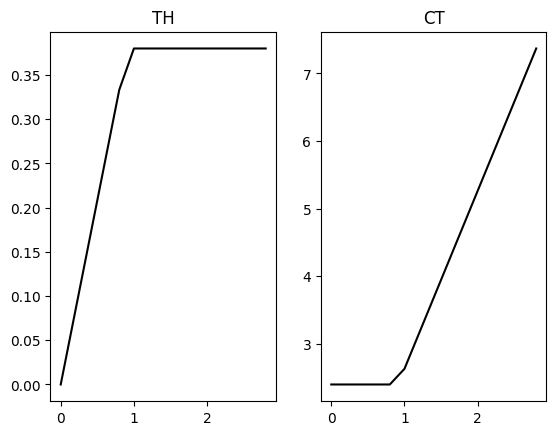

In [25]:
fig, ax = plt.subplots(1,2)
ax[0].set_title('TH')
ax[0].plot(Ws, THs, color='black')
ax[1].set_title('CT')
ax[1].plot(Ws, CTs, color='black')